In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox, AnchoredOffsetbox)
import numpy as np
from cycler import cycler
import itertools
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## Generate Singlet HOMO-LUMO gap vs. $\Delta E_{T-S}$ Figure

In [4]:
## Load file with wB97X calculated energies
energy_df_mod = pd.read_csv('data/GST_energy.csv')
energy_df_mod.head()

,Donor,Acceptor,Singlet Energy,Singlet Spin,Singlet HOMO,Singlet LUMO,Triplet Energy,Triplet Spin,Triplet HOMO,Triplet LUMO,Delta Energy,Singlet HLGap,Triplet HLGap
0,10,1,-213015.857784,1.0,-6.183651,-1.549988,-213014.629021,3.0,-5.266192,-1.298935,1.228763,4.633663,3.967257
1,10,10,-220252.521429,1.0,-6.295191,-1.772658,-220251.576463,3.0,-5.623478,-1.428026,0.944966,4.522532,4.195451
2,10,11,-221567.889931,1.0,-5.643396,-1.484898,-221567.262361,3.0,-5.200803,-1.031529,0.627570,4.158498,4.169274
3,10,12,-262086.384152,1.0,-6.601210,-1.603376,-262084.976445,3.0,-5.895319,-1.520028,1.407707,4.997833,4.375291
4,10,2,-431060.191151,1.0,-6.073608,-1.598070,-431059.159296,3.0,-5.339418,-1.335181,1.031855,4.475538,4.004237


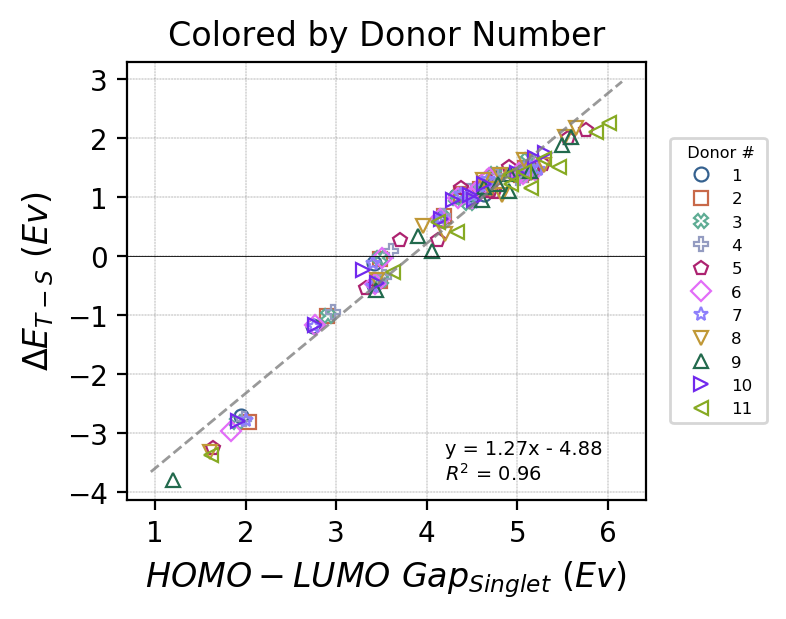

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4.2, 3.2), dpi= 200, facecolor='w', edgecolor='k')

ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)
ax.set_xticks(np.arange(0,9, 1))
ax.set_yticks(np.arange(-7,5, 1))

starting_color = 0
new_colors = ["#35618f", "#c86949", "#5eac94", "#949cc1", "#ad2270", "#e26df8", "#8e80fb", "#c09836", "#226a4d", "#7129ed", "#87aa23", "#f53a4c", "#d286b0", "#864b6f"]
marker = itertools.cycle(('o','s','X','P','p','D','*','v','^','>','<','d','h')) 
ax.set_prop_cycle(cycler(color=new_colors))
groups = energy_df_mod.groupby('Donor')

for name, group in groups:
    ax.plot(group['Singlet HLGap'], group['Delta Energy'], alpha = 1, marker=next(marker), markeredgewidth = 0.8, linestyle='', markersize=5, fillstyle = 'none', label=name)
    
left, right = ax.get_xlim()
reg_x = np.arange(left,right,0.1)

slope, intercept, total_r_value, p_value, std_err = linregress(energy_df_mod['Singlet HLGap'], energy_df_mod['Delta Energy'])
total_plt, = plt.plot(reg_x,slope*reg_x + intercept, c = 'gray',ls = '--', lw = 1, alpha = 0.8)
ax.annotate(r'y = {:.2f}x - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(slope,abs(intercept), total_r_value**2), xy = (4.2,-3.8), fontsize = 7)
    
ax.legend(fontsize = 6, bbox_to_anchor=(0.9, 0.4, 0.35, 0.2), loc=7, title = '  Donor # ', title_fontsize = 'xx-small')
ax.set_xlabel(r'${HOMO-LUMO~Gap}_{Singlet}~(Ev)$', fontsize = 12)
ax.set_ylabel(r'$\Delta E_{T-S}~(Ev$)', fontsize = 12)
plt.axhline(0, lw = 0.3, ls = '-', c = 'k')
plt.title('Colored by Donor Number')
plt.tight_layout()
#plt.savefig('figures/energy_correlation_by_donor.png')
plt.show()

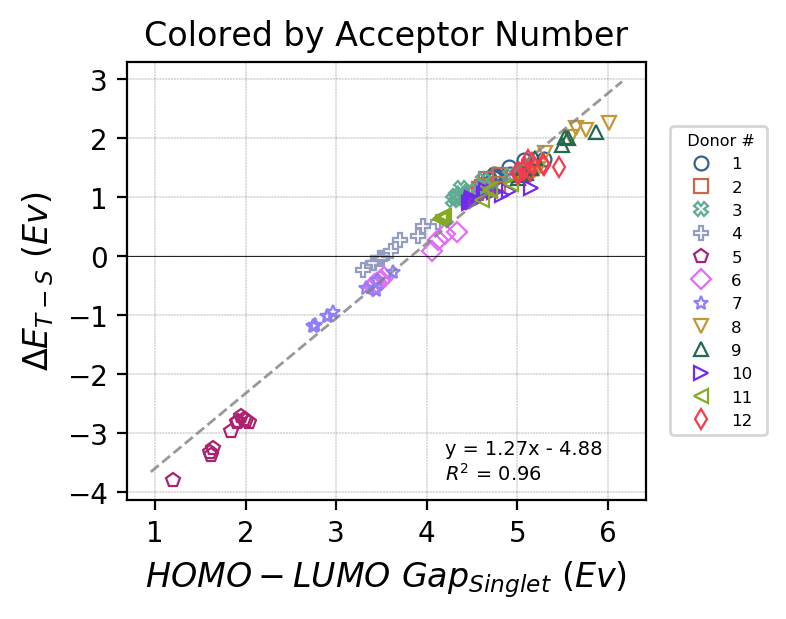

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(4.2, 3.2), dpi= 200, facecolor='w', edgecolor='k')

ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)
ax.set_xticks(np.arange(0,9, 1))
ax.set_yticks(np.arange(-7,5, 1))

starting_color = 0
new_colors = ["#35618f", "#c86949", "#5eac94", "#949cc1", "#ad2270", "#e26df8", "#8e80fb", "#c09836", "#226a4d", "#7129ed", "#87aa23", "#f53a4c", "#d286b0", "#864b6f"]
marker = itertools.cycle(('o','s','X','P','p','D','*','v','^','>','<','d','h')) 
ax.set_prop_cycle(cycler(color=new_colors))
groups = energy_df_mod.groupby('Acceptor')

for name, group in groups:
    ax.plot(group['Singlet HLGap'], group['Delta Energy'], alpha = 1, marker=next(marker), markeredgewidth = 0.8, linestyle='', markersize=5, fillstyle = 'none', label=name)
    
left, right = ax.get_xlim()
reg_x = np.arange(left,right,0.1)

slope, intercept, total_r_value, p_value, std_err = linregress(energy_df_mod['Singlet HLGap'], energy_df_mod['Delta Energy'])
total_plt, = plt.plot(reg_x,slope*reg_x + intercept, c = 'gray',ls = '--', lw = 1, alpha = 0.8)
ax.annotate(r'y = {:.2f}x - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(slope,abs(intercept), total_r_value**2), xy = (4.2,-3.8), fontsize = 7)
    
ax.legend(fontsize = 6, bbox_to_anchor=(0.9, 0.4, 0.35, 0.2), loc=7, title = '  Donor # ', title_fontsize = 'xx-small')
ax.set_xlabel(r'${HOMO-LUMO~Gap}_{Singlet}~(Ev)$', fontsize = 12)
ax.set_ylabel(r'$\Delta E_{T-S}~(Ev$)', fontsize = 12)
plt.axhline(0, lw = 0.3, ls = '-', c = 'k')
plt.title('Colored by Acceptor Number')
plt.tight_layout()
#plt.savefig('figures/energy_correlation_by_acceptor.pdf')
plt.show()

## Generate Inter-Bond Length Correlation Figures

In [2]:
## Load file with inter-bond length info
bond_df = pd.read_csv('data/GST_bond_lengths.csv')
bond_df.head()

,Donor,Acceptor,Triplet_BL,Singlet_BL
0,9,1,1.431074,1.431074
1,11,1,1.436895,1.436895
2,1,1,1.429716,1.429716
3,5,1,1.435546,1.435546
4,10,1,1.428989,1.428989


In [30]:
## Merge data frames
energy_df_mod = energy_df_mod.merge(bond_df[['Donor','Acceptor','Triplet_BL']], on = ['Donor','Acceptor'])
energy_df_mod.head()

,Donor,Acceptor,Singlet Energy,Singlet Spin,Singlet HOMO,Singlet LUMO,Triplet Energy,Triplet Spin,Triplet HOMO,Triplet LUMO,Delta Energy,Singlet HLGap,Triplet HLGap,Triplet_BL_x,Triplet_BL_y
0,10,1,-213015.857784,1.0,-6.183651,-1.549988,-213014.629021,3.0,-5.266192,-1.298935,1.228763,4.633663,3.967257,1.428989,1.428989
1,10,10,-220252.521429,1.0,-6.295191,-1.772658,-220251.576463,3.0,-5.623478,-1.428026,0.944966,4.522532,4.195451,1.415583,1.415583
2,10,11,-221567.889931,1.0,-5.643396,-1.484898,-221567.262361,3.0,-5.200803,-1.031529,0.627570,4.158498,4.169274,1.403422,1.403422
3,10,12,-262086.384152,1.0,-6.601210,-1.603376,-262084.976445,3.0,-5.895319,-1.520028,1.407707,4.997833,4.375291,1.438651,1.438651
4,10,2,-431060.191151,1.0,-6.073608,-1.598070,-431059.159296,3.0,-5.339418,-1.335181,1.031855,4.475538,4.004237,1.429092,1.429092


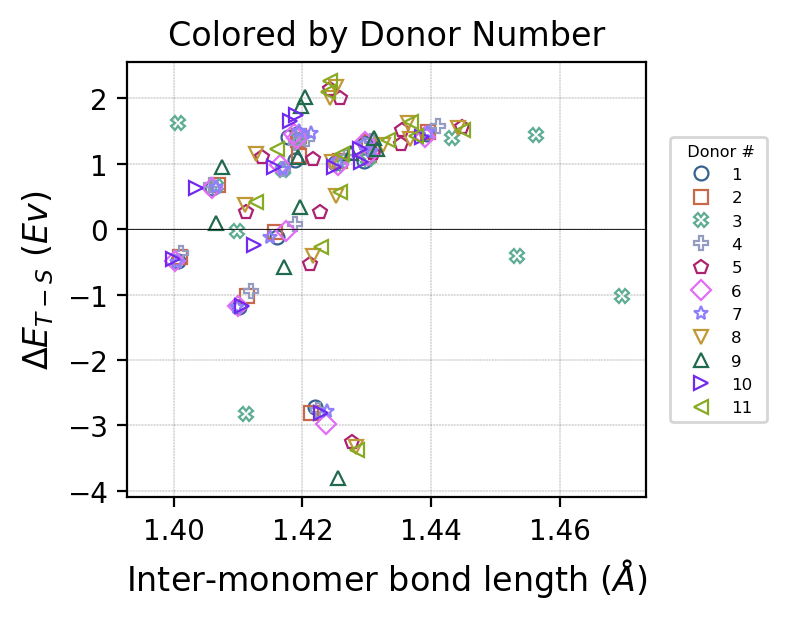

In [26]:
#fig=plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 1, figsize=(4.2, 3.2), dpi= 200, facecolor='w', edgecolor='k')

ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)
#ax.set_xticks(np.arange(0,9, 1))
ax.set_yticks(np.arange(-7,5, 1))
#ax.set_xlim(4,8)
#ax.set_ylim(1,3.5)

n = 14 # Number of colors0
#new_colors = [plt.get_cmap(cc.cm.glasbey_category10)(1. * i/n) for i in range(n)]
starting_color = 0
#new_colors = cc.glasbey_category10[starting_color:n+starting_color]
new_colors = ["#35618f", "#c86949", "#5eac94", "#949cc1", "#ad2270", "#e26df8", "#8e80fb", "#c09836", "#226a4d", "#7129ed", "#87aa23", "#f53a4c", "#d286b0", "#864b6f"]
marker = itertools.cycle(('o','s','X','P','p','D','*','v','^','>','<','d','h')) 
ax.set_prop_cycle(cycler(color=new_colors))
groups = energy_df_mod.groupby('Donor')

for name, group in groups:
    ax.plot(group['Triplet_BL'], group['Delta Energy'], alpha = 1, marker=next(marker), markeredgewidth = 0.8, linestyle='', markersize=5, fillstyle = 'none', label=name)
    
#plt.scatter(energy_df_mod['Singlet HLGap'], energy_df_mod['Delta Energy'], s = 10, c = energy_df_mod.Donor.astype(int), cmap = 'gray')

curve_fit = 'linear'
#curve_fit = 'log'
left, right = ax.get_xlim()
reg_x = np.arange(left,right,0.1)

if curve_fit == 'log':
    popt, pcov= curve_fit(func, energy_df_mod['Triplet_BL'], energy_df_mod['Delta Energy'])
    reg_x = np.arange(left,right,0.1)
    reg_y = popt[0]*np.log(reg_x) + popt[1]
    ax.plot(reg_x,reg_y, c = 'darkgray', lw = 1, ls = '--', zorder = -1)

    perr = np.sqrt(np.diag(pcov))
    y_pred = func(energy_df_mod['Singlet HLGap'], popt[0], popt[1])
    r2 = r2_score(energy_df_mod['Delta Energy'], y_pred)

#    ax.annotate(r'y = {:.2f}$\times$ln(x) - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(popt[0],abs(popt[1]), r2), xy = (3.8,-5.5), fontsize = 7)

elif curve_fit =='linear':
    slope, intercept, total_r_value, p_value, std_err = linregress(energy_df_mod['Triplet_BL'], energy_df_mod['Delta Energy'])
    total_plt, = plt.plot(reg_x,slope*reg_x + intercept, c = 'gray',ls = '--', lw = 1, alpha = 0.8)
#    ax.annotate(r'y = {:.2f}x - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(slope,abs(intercept), total_r_value**2), xy = (4.2,-3.8), fontsize = 7)
    

ax.legend(fontsize = 6, bbox_to_anchor=(0.9, 0.4, 0.35, 0.2), loc=7, title = '  Donor # ', title_fontsize = 'xx-small')
ax.set_xlabel(r'Inter-monomer bond length ($\AA$)', fontsize = 12)
ax.set_ylabel(r'$\Delta E_{T-S}~(Ev$)', fontsize = 12)
plt.axhline(0, lw = 0.3, ls = '-', c = 'k')
plt.title('Colored by Donor Number')
plt.tight_layout()
#plt.savefig('figures/bond_correlation_donor.pdf')
plt.show()

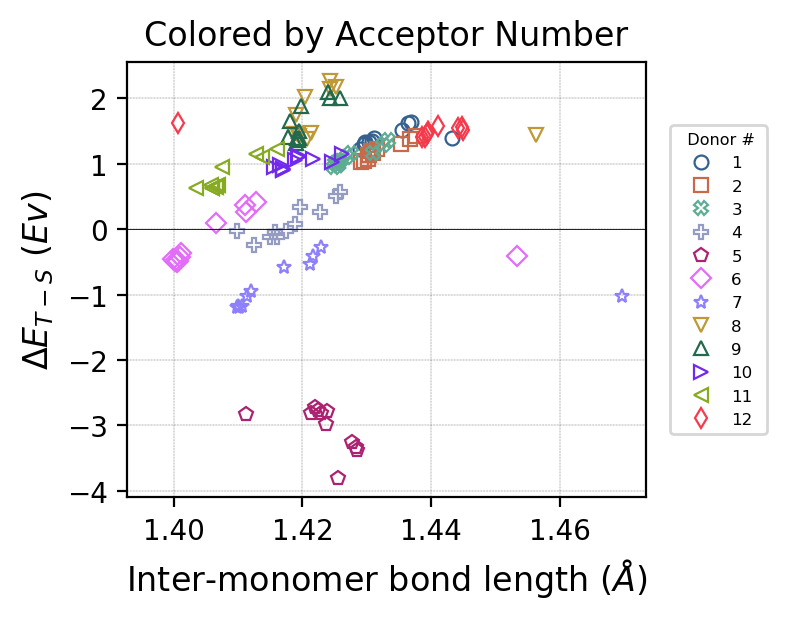

In [29]:
#fig=plt.figure(figsize=(4, 3), dpi= 200, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 1, figsize=(4.2, 3.2), dpi= 200, facecolor='w', edgecolor='k')

ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)
#ax.set_xticks(np.arange(0,9, 1))
ax.set_yticks(np.arange(-7,5, 1))
#ax.set_xlim(4,8)
#ax.set_ylim(1,3.5)

n = 14 # Number of colors0
#new_colors = [plt.get_cmap(cc.cm.glasbey_category10)(1. * i/n) for i in range(n)]
starting_color = 0
#new_colors = cc.glasbey_category10[starting_color:n+starting_color]
new_colors = ["#35618f", "#c86949", "#5eac94", "#949cc1", "#ad2270", "#e26df8", "#8e80fb", "#c09836", "#226a4d", "#7129ed", "#87aa23", "#f53a4c", "#d286b0", "#864b6f"]
marker = itertools.cycle(('o','s','X','P','p','D','*','v','^','>','<','d','h')) 
ax.set_prop_cycle(cycler(color=new_colors))
groups = energy_df_mod.groupby('Acceptor')

for name, group in groups:
    ax.plot(group['Triplet_BL'], group['Delta Energy'], alpha = 1, marker=next(marker), markeredgewidth = 0.8, linestyle='', markersize=5, fillstyle = 'none', label=name)
    
#plt.scatter(energy_df_mod['Singlet HLGap'], energy_df_mod['Delta Energy'], s = 10, c = energy_df_mod.Donor.astype(int), cmap = 'gray')

curve_fit = 'linear'
#curve_fit = 'log'
left, right = ax.get_xlim()
reg_x = np.arange(left,right,0.1)

if curve_fit == 'log':
    popt, pcov= curve_fit(func, energy_df_mod['Triplet_BL'], energy_df_mod['Delta Energy'])
    reg_x = np.arange(left,right,0.1)
    reg_y = popt[0]*np.log(reg_x) + popt[1]
    ax.plot(reg_x,reg_y, c = 'darkgray', lw = 1, ls = '--', zorder = -1)

    perr = np.sqrt(np.diag(pcov))
    y_pred = func(energy_df_mod['Singlet HLGap'], popt[0], popt[1])
    r2 = r2_score(energy_df_mod['Delta Energy'], y_pred)

#    ax.annotate(r'y = {:.2f}$\times$ln(x) - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(popt[0],abs(popt[1]), r2), xy = (3.8,-5.5), fontsize = 7)

elif curve_fit =='linear':
    slope, intercept, total_r_value, p_value, std_err = linregress(energy_df_mod['Triplet_BL'], energy_df_mod['Delta Energy'])
    total_plt, = plt.plot(reg_x,slope*reg_x + intercept, c = 'gray',ls = '--', lw = 1, alpha = 0.8)
#    ax.annotate(r'y = {:.2f}x - {:.2f}' '\n' '$R^2$ = {:.2f}'.format(slope,abs(intercept), total_r_value**2), xy = (4.2,-3.8), fontsize = 7)
    

ax.legend(fontsize = 6, bbox_to_anchor=(0.9, 0.4, 0.35, 0.2), loc=7, title = '  Donor # ', title_fontsize = 'xx-small')
ax.set_xlabel(r'Inter-monomer bond length ($\AA$)', fontsize = 12)
ax.set_ylabel(r'$\Delta E_{T-S}~(Ev$)', fontsize = 12)
plt.axhline(0, lw = 0.3, ls = '-', c = 'k')
plt.title('Colored by Acceptor Number')
plt.tight_layout()
#plt.savefig('figures/bond_correlation_acceptor.png')
plt.show()

## Generate HOMO-LUMO Figures for Donors and Acceptors

In [32]:
## Load files with HOMO-LUMO information for donors and acceptors
donors_df = pd.read_csv('data/donors_HL.csv')
acceptors_df = pd.read_csv('data/acceptors_HL.csv')

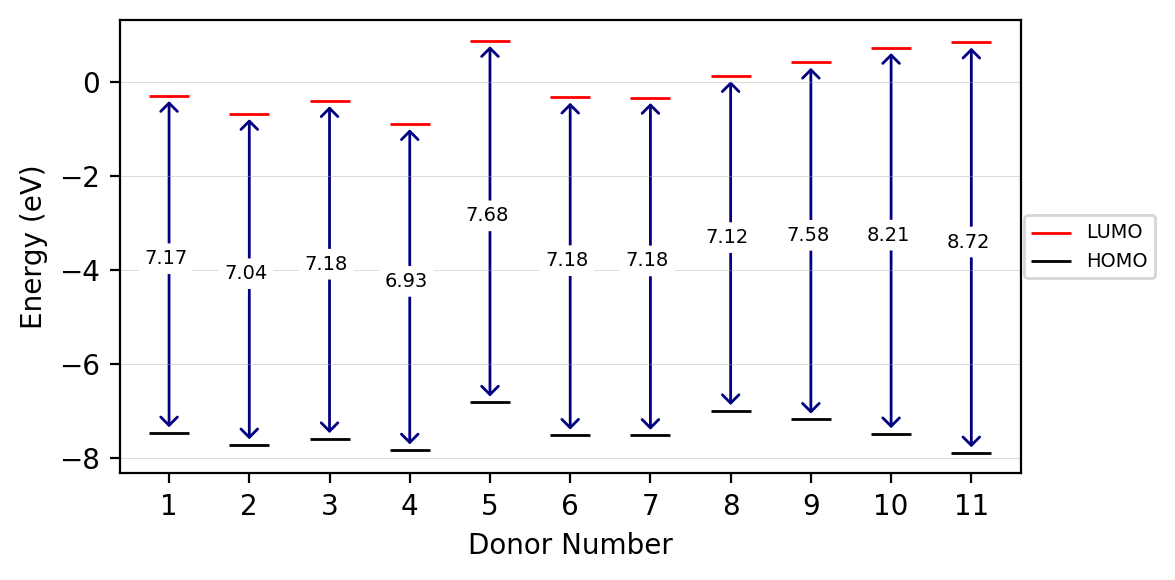

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi= 200, facecolor='w', edgecolor='k')

ax.set_xticks(range(1,15))
ax.grid(which='both', axis = 'y', linewidth = 0.3, alpha = 0.5)
#ax.set_title('Donors HOMO-LUMO')
ax.scatter(donors_df['Donor'], donors_df['LUMO'], marker = '_', c = 'r', linewidth = 1, s = 200, label = 'LUMO')
ax.scatter(donors_df['Donor'], donors_df['HOMO'], marker = '_', c = 'k', linewidth = 1, s = 200, label = 'HOMO')

xgfs_normal12 = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']

for idx, row in donors_df.iterrows():
    ax.annotate('{:.2f}'.format(row['Gap']),(row['Donor']-0.31,row['Halfway']), fontsize = 7, bbox=dict(facecolor='w', edgecolor='none', boxstyle='round,pad=0.3'))
    #arrow = mpatches.FancyArrowPatch((row['Donor'], row['HOMO']), (row['Donor'], row['LUMO']), arrowstyle = '<->, head_length=3, head_width=3', edgecolor = xgfs_normal12[idx])
    arrow = mpatches.FancyArrowPatch((row['Donor'], row['HOMO']), (row['Donor'], row['LUMO']), arrowstyle = '<->, head_length=3, head_width=3', edgecolor = 'navy')
    ax.add_patch(arrow)

ax.legend(loc=7, prop = {'size':'x-small'}, markerscale = 1, bbox_to_anchor=(0.81, 0.4, 0.35, 0.2))
ax.set_xlabel('Donor Number')
ax.set_ylabel('Energy (eV)')
plt.tight_layout()
#plt.savefig('figures/donors_homo_lumo.pdf')
plt.show()

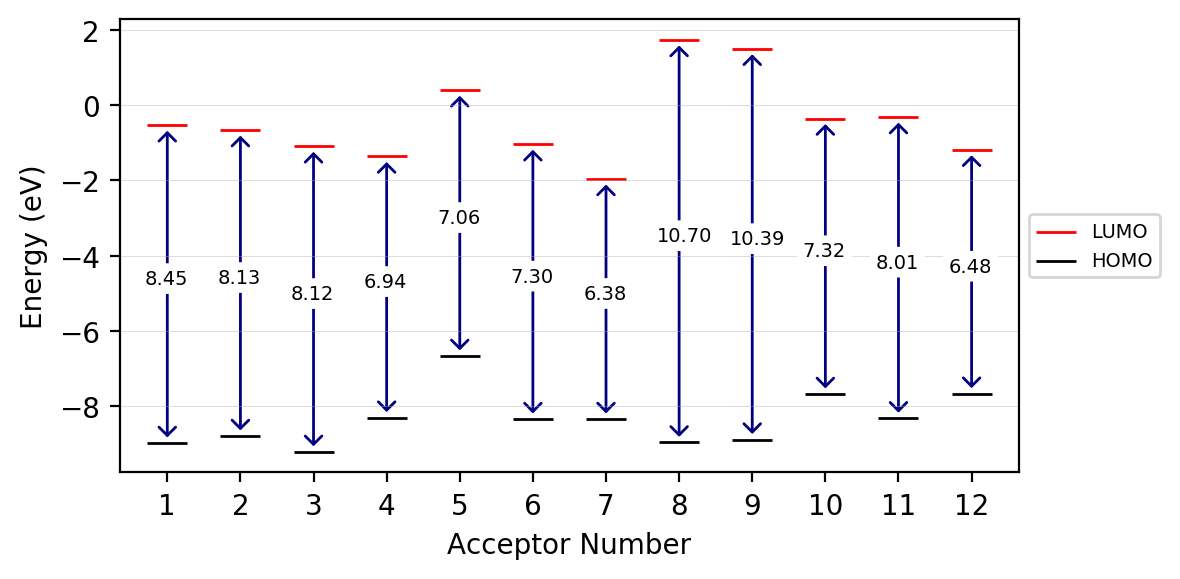

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), dpi= 200, facecolor='w', edgecolor='k')

ax.set_xticks(range(1,13))

ax.grid(which='both', axis = 'y', linewidth = 0.3, alpha = 0.5)
#ax.set_title('Acceptors HOMO-LUMO')
ax.scatter(acceptors_df['Acceptor'], acceptors_df['LUMO'], marker = '_', c = 'r', linewidth = 1, s = 200, label = 'LUMO')
ax.scatter(acceptors_df['Acceptor'], acceptors_df['HOMO'], marker = '_', c = 'k', linewidth = 1, s = 200, label = 'HOMO')

xgfs_normal12 = ['#ebac23', '#b80058', '#008cf9', '#006e00', '#00bbad', '#d163e6', '#b24502', '#ff9287', '#5954d6', '#00c6f8', '#878500', '#00a76c', '#bdbdbd']


for idx, row in acceptors_df.iterrows():
    ax.annotate('{:.2f}'.format(row['Gap']),(row['Acceptor']-0.31,row['Halfway']), fontsize = 7, bbox=dict(facecolor='w', edgecolor='none', boxstyle='round,pad=0.3'))
    #arrow = mpatches.FancyArrowPatch((row['Acceptor'], row['HOMO']), (row['Acceptor'], row['LUMO']), arrowstyle = '<->, head_length=3, head_width=3',  edgecolor = xgfs_normal12[idx])
    arrow = mpatches.FancyArrowPatch((row['Acceptor'], row['HOMO']), (row['Acceptor'], row['LUMO']), arrowstyle = '<->, head_length=3, head_width=3',  edgecolor = 'navy')
    ax.add_patch(arrow)

ax.legend(loc=6, fontsize = 'x-small', markerscale = 1, bbox_to_anchor=(1, 0.4, 0.35, 0.2))
ax.set_xlabel('Acceptor Number')
ax.set_ylabel('Energy (eV)')
plt.tight_layout()
#plt.savefig('figures/acceptors_homo_lumo.pdf')
plt.show()

## Generate Figure to Show Strategies to Lower Gap

In [41]:
gap_df = pd.read_csv('data/gap_strategies.csv')
gap_df.head()

,Name,S wB97X Energy,S HOMO Energy,S LUMO Energy,S Gap Energy,T wB97X Energy,T HOMO Energy,T LUMO Energy,T Gap Energy,Atom,Group,E_TS
0,S2,-127243.572091,-5.827753,-0.031865,5.795889,-127241.942218,-4.366284,0.415844,4.782129,S,2,1.629873
1,Se1,-417147.884508,-6.734546,-0.945079,5.789467,-417146.381518,-5.435773,-0.504091,4.931683,Se,1,1.502990
2,qS1,-92182.242853,-5.195225,-2.348479,2.846746,-92183.471286,-6.079268,-0.401069,5.678200,qS,1,-1.228433
3,N1,-37357.012032,-6.611686,-0.006286,6.605400,-37354.906724,-4.820388,0.307298,5.127686,N,1,2.105308
4,N2,-74517.525544,-5.721085,0.460417,6.181501,-74515.726910,-4.139505,0.890819,5.030324,N,2,1.798634


In [42]:
S = gap_df[gap_df['Atom'] == 'S'].sort_values(by=['Group'])
N = gap_df[gap_df['Atom'] == 'N'].sort_values(by=['Group'])
Se = gap_df[gap_df['Atom'] == 'Se'].sort_values(by=['Group'])
qS = gap_df[gap_df['Atom'] == 'qS'].sort_values(by=['Group'])

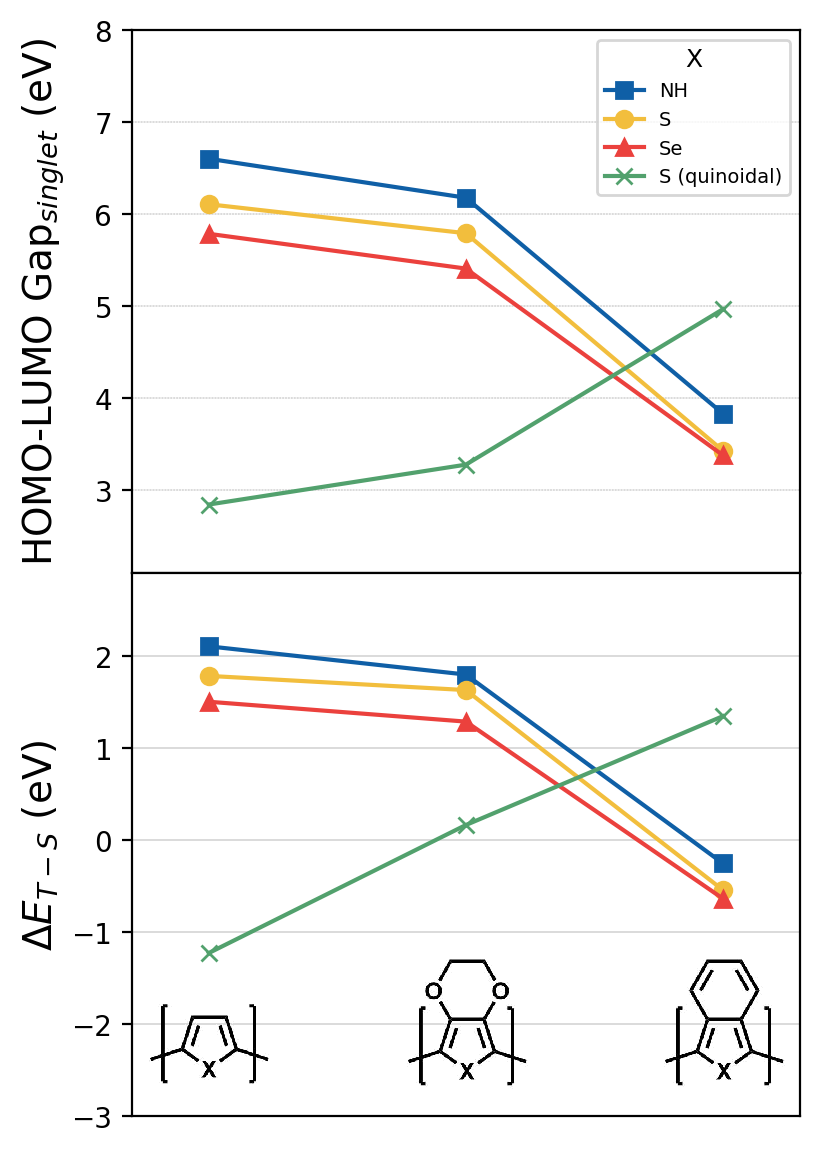

In [51]:
#fig, ax = plt.subplots(2, 1, figsize=(4.2, 6), dpi= 200, facecolor='w', edgecolor='k', sharex = True)
fig = plt.figure(figsize=(4.2, 6), dpi= 200, facecolor='w', edgecolor='k')

gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace=0)
#ax = gs.subplots(sharex=True)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

pp = plt.imread('data/PP.png')

im = OffsetImage(pp, zoom=0.2)
im.image.axes = ax2
ab = AnnotationBbox(im, (0, -1.73),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
ax2.add_artist(ab)

pedot = plt.imread('data/PEDOT.png')

im = OffsetImage(pedot, zoom=0.2)
im.image.axes = ax2
ab = AnnotationBbox(im, (1, -1.5),  xybox=(0.5, -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
ax2.add_artist(ab)

pbt = plt.imread('data/PBT.png')

im = OffsetImage(pbt, zoom=0.2)
im.image.axes = ax2
ab = AnnotationBbox(im, (2, -1.5),  xybox=(0.5, -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
ax2.add_artist(ab)

ax2.set(xticklabels=[])
ax2.tick_params(bottom=False)

ax1.set_ylabel(r'HOMO-LUMO Gap$_{singlet}$ (eV)', fontsize = 14, labelpad = 10)
ax1.set_ylim(2.1, 8)
ax1.set_xlim(-.3, 2.3)
ax1.grid(color='k', axis = 'y', which = 'both', ls = '-.', lw = 0.1)
ax1.plot(N['Group']-1, N['S Gap Energy'], c = '#0F5FA6', label  = 'NH', marker = 's')
ax1.plot(S['Group']-1, S['S Gap Energy'], c = '#F2BE3D', ls = '-', label = 'S', marker = 'o')
ax1.plot(Se['Group']-1, Se['S Gap Energy'], c = '#EB413D', label = 'Se', marker = '^')
ax1.plot(qS['Group']-1, qS['S Gap Energy'], c = '#52A16D', ls = '-', label = 'S (quinoidal)', marker = 'x')
ax1.legend(title = 'X', fontsize = 7, markerscale = 1, title_fontsize = 9)

ax2.set_ylabel(r'$\Delta E_{T-S}$ (eV)', fontsize = 14)
ax2.set_ylim(-3, 2.9)
ax2.set_xlim(-.3, 2.3)
ax2.grid(color='k', axis = 'y', which = 'both', ls = '-', lw = 0.1)
ax2.plot(N['Group']-1, N['E_TS'], c = '#0F5FA6', ls = '-', label  = 'NH', marker = 's')
ax2.plot(S['Group']-1, S['E_TS'], c = '#F2BE3D', ls = '-', label = 'S', marker = 'o')
ax2.plot(Se['Group']-1, Se['E_TS'], c = '#EB413D', ls = '-', label = 'Se', marker = '^')
ax2.plot(qS['Group']-1, qS['E_TS'], c = '#52A16D', ls = '-', label = 'S (quinoidal)', marker = 'x')

plt.subplots_adjust(hspace=0)
plt.tight_layout()
#plt.savefig('figures/gap_strat.png')
plt.show()

## Generate GFN2-xTB Singlet Gap vs. wB97X Singlet Gap Figure

In [70]:
singlet_df = pd.read_csv('data/gfn2_wB97X_gap.csv')
singlet_df.head()

,Donor,Acceptor,wB97X HOMO,wB97X LUMO,wB97X HLGap,GFN2 HOMO,GFN2 LUMO,GFN2 HLGap
0,10,1,-6.183651,-1.549988,4.633663,-9.2541,-8.4980,0.7561
1,10,10,-6.295191,-1.772658,4.522532,-9.3937,-8.7191,0.6746
2,10,11,-5.643396,-1.484898,4.158498,-8.9902,-8.4567,0.5335
3,10,12,-6.601210,-1.603376,4.997833,-9.5289,-8.5954,0.9335
4,10,2,-6.073608,-1.598070,4.475538,-9.2913,-8.6464,0.6449


In [71]:
def log_func(x, a, b):
    return a * np.log(x) + b

def sqrt_func(x, a, b):
    return a * np.sqrt(x) + b

## Only Acceptor A5
singlet_df_5 = singlet_df[singlet_df['Acceptor'] == 5]

## Data without Acceptor A5
singlet_df_no5 = singlet_df[singlet_df['Acceptor'] != 5]

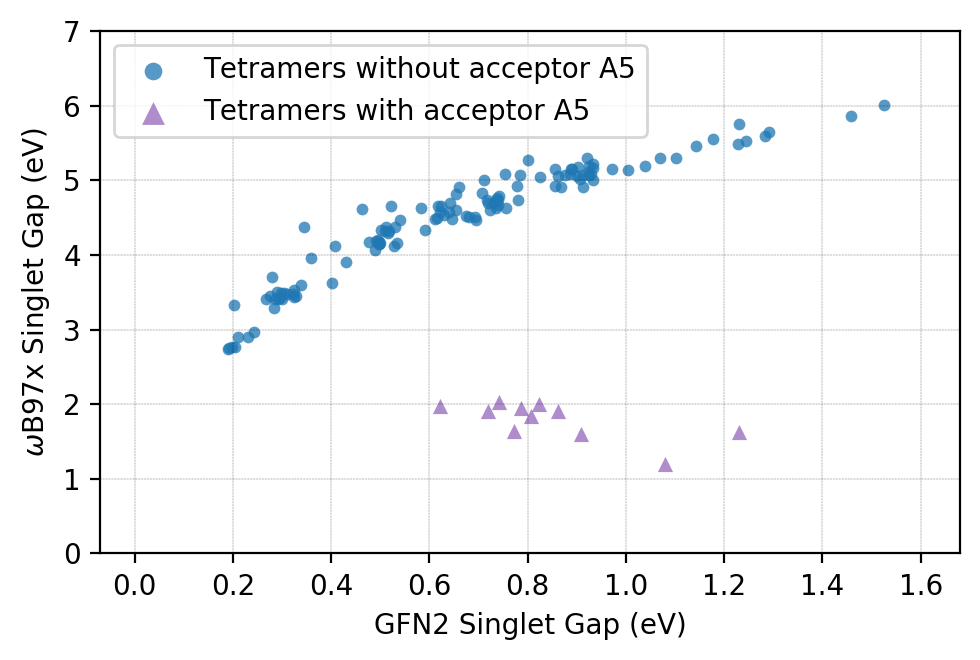

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.4), dpi= 200, facecolor='w', edgecolor='k')
ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)

ax.set_ylim(0,7)
ax.set_xlim(-0.07,1.68)

ax.scatter(singlet_df_no5['GFN2 HLGap'], singlet_df_no5['wB97X HLGap'], color = 'tab:blue', alpha = 0.75, s = 18, lw = 0, label = 'Tetramers without acceptor A5')
ax.scatter(singlet_df_5['GFN2 HLGap'], singlet_df_5['wB97X HLGap'], color = 'tab:purple', alpha = 0.75, s = 30, lw = 0, marker = '^', label = 'Tetramers with acceptor A5')

ax.legend(markerscale = 1.5, loc = 2)

ax.set_xlabel('GFN2 Singlet Gap (eV)')
ax.set_ylabel(r'$\omega$B97x Singlet Gap (eV)')
plt.tight_layout()
#plt.savefig('figures/gfn2_wb97x_gap_correlation_A5.png')
plt.show()


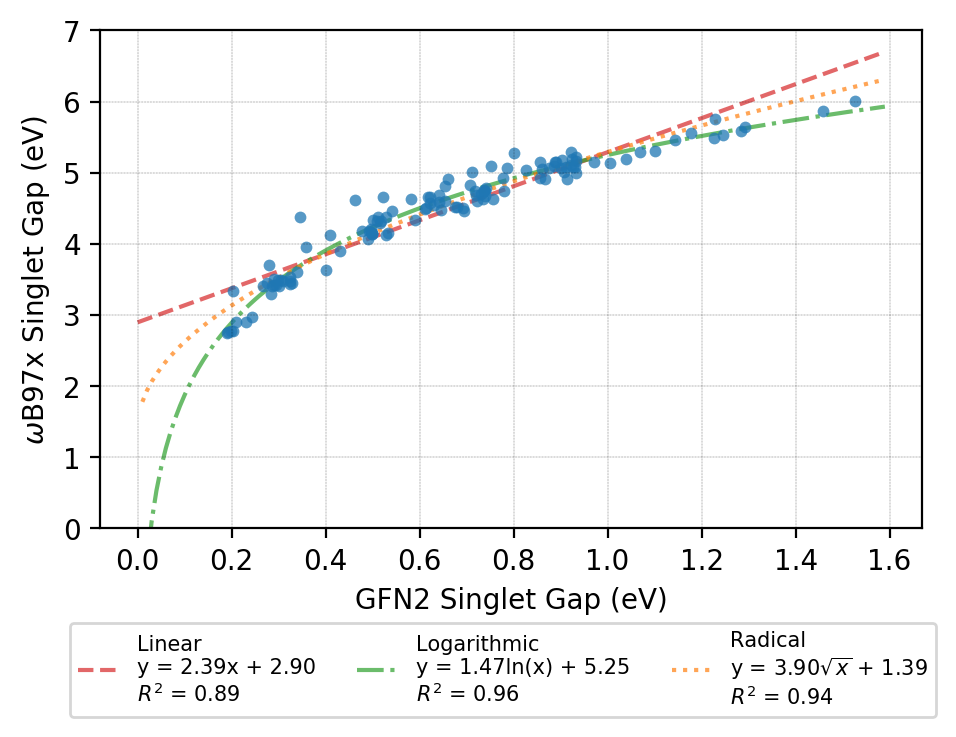

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi= 200, facecolor='w', edgecolor='k')
ax.grid(color='k', which = 'both', ls = '-.', lw = 0.1)

ax.set_ylim(0,7)

ax.scatter(singlet_df_no5['GFN2 HLGap'], singlet_df_no5['wB97X HLGap'], color = 'tab:blue', alpha = 0.75, s = 18, lw = 0)

left, right = ax.get_xlim()
reg_x = np.arange(0,right,0.01)
slope, intercept, lin_r_value, p_value, std_err = linregress(singlet_df_no5['GFN2 HLGap'], singlet_df_no5['wB97X HLGap'])
linear_plt = ax.plot(reg_x,slope*reg_x + intercept, c = 'tab:red',ls = '--', lw = 1.5, alpha = 0.7, zorder = -1)

reg_x = np.arange(0.01,right,0.01)
log_popt, pcov = curve_fit(log_func, singlet_df_no5['GFN2 HLGap'], singlet_df_no5['wB97X HLGap'])
reg_y = log_popt[0]*np.log(reg_x) + log_popt[1]
log_plt = ax.plot(reg_x,reg_y, c = 'tab:green', lw = 1.5, ls = '-.', zorder = -1, alpha = 0.7)
perr = np.sqrt(np.diag(pcov))
y_pred = log_func(singlet_df_no5['GFN2 HLGap'], log_popt[0], log_popt[1])
log_r2 = r2_score(singlet_df_no5['wB97X HLGap'], y_pred)

reg_x = np.arange(0.01,right,0.01)
sqrt_popt, pcov = curve_fit(sqrt_func, singlet_df_no5['GFN2 HLGap'], singlet_df_no5['wB97X HLGap'])
reg_y = sqrt_popt[0]*np.sqrt(reg_x) + sqrt_popt[1]
sqrt_plt = ax.plot(reg_x,reg_y, c = 'tab:orange', lw = 1.5, ls = ':', zorder = -1, alpha = 0.7)
perr = np.sqrt(np.diag(pcov))
y_pred = sqrt_func(singlet_df_no5['GFN2 HLGap'], sqrt_popt[0], sqrt_popt[1])
sqrt_r2 = r2_score(singlet_df_no5['wB97X HLGap'], y_pred)

ax.legend([linear_plt[0], log_plt[0], sqrt_plt[0]], 
          [r'Linear' '\n' 'y = {:.2f}x + {:.2f}' '\n' '$R^2$ = {:.2f}'.format(slope,abs(intercept), lin_r_value**2), 
           r'Logarithmic' '\n' 'y = {:.2f}ln(x) + {:.2f}' '\n' '$R^2$ = {:.2f}'.format(log_popt[0],abs(log_popt[1]), log_r2),
           r'Radical' '\n' 'y = {:.2f}$\sqrt{{x}}$ + {:.2f}' '\n' '$R^2$ = {:.2f}'.format(sqrt_popt[0],sqrt_popt[1], sqrt_r2)],
         loc = 8, ncol = 3, fontsize = 7.5, bbox_to_anchor=(0.49, -0.4))

ax.set_xlabel('GFN2 Singlet Gap (eV)')
ax.set_ylabel(r'$\omega$B97x Singlet Gap (eV)')
plt.tight_layout()
#plt.savefig('figures/gfn2_wb97x_gap_correlation.pdf')
plt.show()